In [10]:
import pandas as pd
import zipfile

# File paths for uploaded data
lyric_path = 'datasets/Country_spotify_lyrics.csv'
lyric_data = pd.read_csv(artists_file_path)
lyric_head = artists_data.head()

lyric_head


,Genre,Title,Artist,Lyrics
0,Pop,Die With A Smile,"Lady Gaga, Bruno Mars","[Intro: Bruno Mars]\n(Ooh, ooh)\n[Verse 1: Bru..."
1,Pop,BIRDS OF A FEATHER,Billie Eilish,[Intro]\n[Verse 1]\nI want you to stay\n'Til I...
2,Rock,Rockin' Around The Christmas Tree,Brenda Lee,[Verse]\nRockin' around the Christmas tree\nAt...
3,Rock,Sweater Weather,The Neighbourhood,[Verse 1]\nAnd all I am is a man\nI want the w...
4,Hip-Hop,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis","1. Tyler, The Creator - See You Again (feat. K..."


In [8]:
# Access the lyrics for a specific song by its row index
row_index = 1  # Replace with the index of the song you want to check
full_lyrics = lyric_data.loc[row_index, "Lyrics"]

# Print the full lyrics
print(f"Lyrics for '{lyric_data.loc[row_index, 'Title']}' by {lyric_data.loc[row_index, 'Artist']}:\n")
print(full_lyrics)


Lyrics for 'BIRDS OF A FEATHER' by Billie Eilish:

[Intro]
[Verse 1]
I want you to stay
'Til I'm in the grave
'Til I rot away, dead and buried
'Til I'm in the casket you carry
If you go, I'm goin' too, uh
'Cause it was always you (Alright)
And if I'm turnin' blue, please don't save me
Nothin' left to lose without my baby
[Refrain]
Birds of a feather, we should stick together
, 
I know
I said I'd never think I wasn't better alone
Can't change the weather, might not be forever
But if it's forever, it's even better
[Pre-Chorus]
And I don't know what I'm cryin' for
I don't think I could love you more
It might not be long, but baby, I
[Chorus]
I'll love you 'til the day that I die
'Til the day that I die
'Til the light leaves my eyes
'Til the day that I die


In [ ]:
genres = ["Pop", "Rock", "Hip-Hop", "Country", "Electronic", "Jazz"]


# load data

In [25]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import os


[nltk_data] Downloading package punkt to /Users/postgres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/postgres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/postgres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:


# Load and combine all CSV files
all_files = ["datasets/Jazz_spotify_lyrics.csv", "datasets/Electronic_spotify_lyrics.csv", "datasets/Country_spotify_lyrics.csv",
             "datasets/Hip-Hop_spotify_lyrics.csv", "datasets/Rock_spotify_lyrics.csv", "datasets/Pop_spotify_lyrics.csv"]

dataframes = []
for file in all_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combine all datasets into one
lyrics_data = pd.concat(dataframes, ignore_index=True)

# Inspect the dataset
print(lyrics_data.head())


  Genre                                        Title               Artist  \
0  Jazz  It's Beginning to Look a Lot like Christmas        Michael Bublé   
1  Jazz                        Holly Jolly Christmas        Michael Bublé   
2  Jazz               Christmas Time Is Here - Vocal  Vince Guaraldi Trio   
3  Jazz                                 O Tannenbaum  Vince Guaraldi Trio   
4  Jazz                        Holly Jolly Christmas        Michael Bublé   

                                              Lyrics  
0  [Verse 1]\nIt's beginning to look a lot like C...  
1  Have a holly, jolly Christmas\nIt's the best t...  
2  "Jingle Bells" - Duke Ellington\n"When There's...  
3               Lyrics not in English or unavailable  
4  Have a holly, jolly Christmas\nIt's the best t...  


In [39]:
# Print the updated shape of the dataset
print(f"Dataset shape after filtering short lyrics: {lyrics_data.shape}")

Dataset shape after filtering short lyrics: (11000, 4)


# handle missing values and clean lyrics

In [40]:
# Drop rows where lyrics are missing
lyrics_data = lyrics_data.dropna(subset=['Lyrics'])

# Reset the index
lyrics_data.reset_index(drop=True, inplace=True)


In [41]:
# Print the updated shape of the dataset
print(f"Dataset shape after filtering short lyrics: {lyrics_data.shape}")

Dataset shape after filtering short lyrics: (11000, 4)


In [45]:
# Drop rows where lyrics have less than 10 characters
cleaned_lyrics_data = lyrics_data[lyrics_data['Lyrics'].str.len() >= 100]

# Reset the index after filtering
lyrics_data.reset_index(drop=True, inplace=True)

# Print the updated dataset shape
print(f"Dataset shape after filtering short lyrics: {cleaned_lyrics_data.shape}")



Dataset shape after filtering short lyrics: (5470, 4)


# Save the Cleaned Dataset

In [46]:
# Save the cleaned dataset to a new CSV file
cleaned_lyrics_data.to_csv("datasets/cleaned_lyrics_dataset.csv", index=False)

print("Data cleaning complete! Cleaned dataset saved as 'cleaned_lyrics_dataset.csv'.")


Data cleaning complete! Cleaned dataset saved as 'cleaned_lyrics_dataset.csv'.


# Analysis

Analysis
After preprocessing, analyze the cleaned dataset to ensure quality.

Steps:
Visualize Word Distribution

Use a word cloud to visualize common words in lyrics per genre.
Check the average number of words per lyric.
Check Genre Distribution

Plot the number of songs per genre to ensure balance in the dataset.
Code for Analysis
python
Copy code


In [ ]:
# Count the number of songs in each genre
genre_counts = cleaned_lyrics_data['Genre'].value_counts()

# Print the counts
print("Number of songs in each genre:")
print(genre_counts)


In [ ]:
!pip install wordcloud

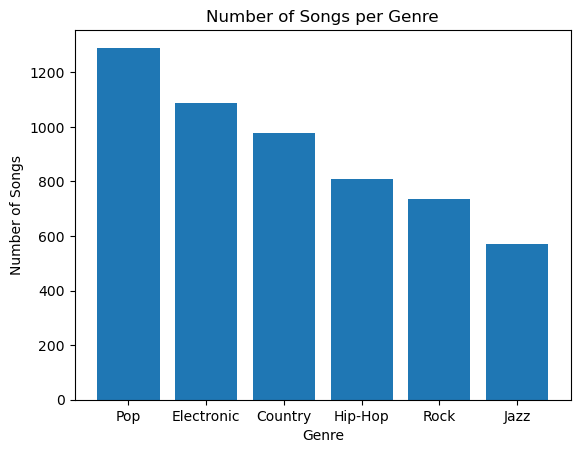

/var/folders/04/byk4nbts3g94l_n39hc97_tm0000gp/T/ipykernel_3675/582512172.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genre_lyrics = ' '.join(cleaned_lyrics_data[lyrics_data['Genre'] == genre]['Lyrics'])


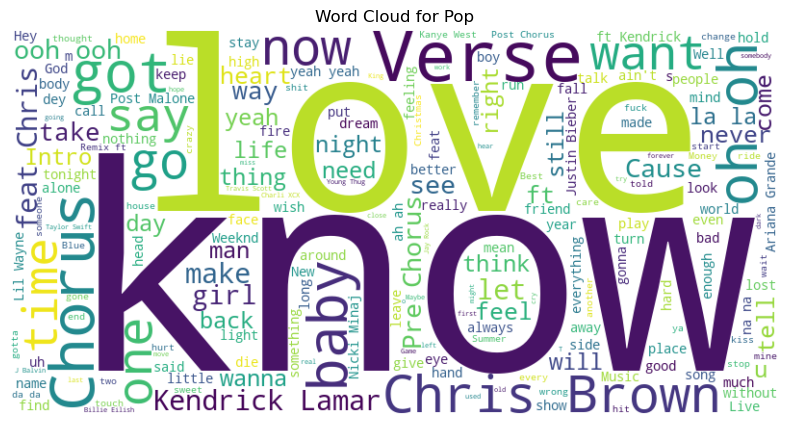

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot genre distribution
genre_counts = cleaned_lyrics_data['Genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.title("Number of Songs per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.show()

# Generate a word cloud for one genre
def generate_wordcloud(genre):
    genre_lyrics = ' '.join(cleaned_lyrics_data[lyrics_data['Genre'] == genre]['Lyrics'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_lyrics)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {genre}")
    plt.show()

# Example: Generate a word cloud for the "Pop" genre
generate_wordcloud('Pop')


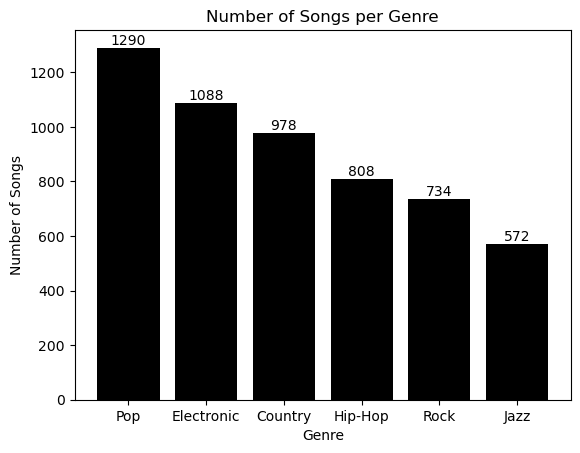

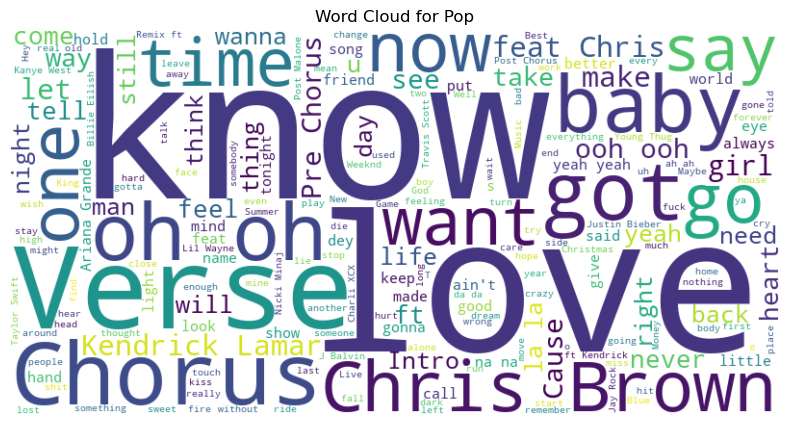

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot genre distribution
genre_counts = cleaned_lyrics_data['Genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values, color='black')
plt.title("Number of Songs per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Add exact numbers on top of each bar
for i, v in enumerate(genre_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')  # Adjust y-coordinate for better visibility

plt.show()

# Generate a word cloud for one genre
def generate_wordcloud(genre):
    genre_lyrics = ' '.join(cleaned_lyrics_data[cleaned_lyrics_data['Genre'] == genre]['Lyrics'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_lyrics)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {genre}")
    plt.show()

# Example: Generate a word cloud for the "Pop" genre
generate_wordcloud('Pop')
